# **The ninth in-class-exercise (20 points in total, 4/16/2021)**

The purpose of the exercise is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [6]:
!git clone https://github.com/unt-iialab/info5731_spring2021.git

Cloning into 'info5731_spring2021'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 147 (delta 8), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (147/147), 1.75 MiB | 23.90 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [7]:
!cp /content/info5731_spring2021/class_exercises/exercise09_datacollection.zip /content/

In [9]:
!rm -r /content/info5731_spring2021

In [10]:
!unzip exercise09_datacollection.zip

Archive:  exercise09_datacollection.zip
   creating: exercise09_datacollection/
  inflating: exercise09_datacollection/stsa-test.txt  
  inflating: exercise09_datacollection/stsa-train.txt  


In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [45]:
with open('exercise09_datacollection/stsa-train.txt') as fin:
    datatrain = fin.readlines()
with open('exercise09_datacollection/stsa-test.txt') as fin:
    datatest = fin.readlines()

In [46]:
target = [x[0] for x in datatrain]
text = [x.strip()[2:] for x in datatrain]

In [47]:
train = pd.DataFrame({'text' : text, 'target': target})
train

,text,target
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [48]:
target = [x[0] for x in datatest]
text = [x.strip()[2:] for x in datatest]

In [49]:
test = pd.DataFrame({'text' : text, 'target': target})
test

,text,target
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1
...,...,...
1816,"an often-deadly boring , strange reading of a ...",0
1817,the problem with concept films is that if the ...,0
1818,"safe conduct , however ambitious and well-inte...",0
1819,"a film made with as little wit , interest , an...",0


In [55]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [56]:
def remove_punctuation(row):
    return [w for w in row if w not in punctuation]

In [57]:
train.text = train.text.apply(word_tokenize)
train.text = train.text.apply(remove_punctuation)
train.text = train.text.apply(lambda x: [w.lower() for w in x])

In [59]:
X = train.text.apply(lambda x: ' '.join(x)).values
y = train.target.apply(lambda x: int(x)).values

In [61]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                test_size=0.2, random_state=1)

In [68]:
naive_bayes = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
models = [naive_bayes, svc, knn, dt, rf, xgb]
names = ['nb', 'svc', 'knn', 'dt', 'rf', 'xgb']
estimators = []
for name, model in zip(names, models):
    clf = Pipeline([('vect', CountVectorizer()), (name, model)])
    estimators.append(clf)

In [70]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [71]:
scores = {name : None for name in names}
scoring = {'accuracy_score' : 'accuracy',
           'precision_score' : 'precision',
           'recall_score' : 'recall', 
           'f1_score' : 'f1'}
for name, clf in zip(names, estimators):
    scores[name] = cross_validate(clf, train_X, train_y, cv=cv, scoring=scoring)

In [72]:
def get_dict():
    return {name : None for name in names}
accuracy_scores = get_dict()
precision_scores = get_dict()
recall_scores = get_dict()
f1_scores = get_dict()
estimator_names = list(scores.keys())
for name in scores.keys():
    for score, d in zip(['accuracy_score', 'precision_score',
                         'recall_score', 'f1_score'],
                        [accuracy_scores, precision_scores,
                         recall_scores, f1_scores]):
        score_name = 'test_' + score
        d[name] = scores[name][score_name]

In [73]:
def get_mean_scores(d):
    return [(name, np.mean(value)) for name, value in d.items()]

In [74]:
accuracy_mean = get_mean_scores(accuracy_scores)
precision_mean = get_mean_scores(precision_scores)
recall_mean = get_mean_scores(recall_scores)
f1_mean = get_mean_scores(f1_scores)

In [75]:
from matplotlib import pyplot as plt

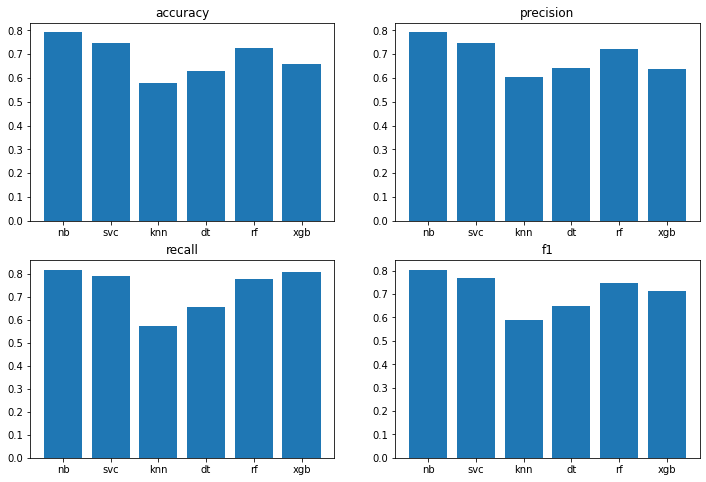

In [76]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 8)
axes = axes.flatten()
for ax, t, title in zip(axes, [accuracy_mean, precision_mean, recall_mean, f1_mean],
                 ['accuracy', 'precision', 'recall', 'f1']):
    ax.bar(range(len(names)), [mean for _, mean in t], tick_label=names)
    ax.set_title(title)

In [77]:
def print_mean_scores(t, scoring_name):
    for name, score in t:
        print(name, 'mean', scoring_name, 'score is', score)

In [78]:
for t, name in zip([accuracy_mean, precision_mean, recall_mean, f1_mean], 
                   ['accuracy', 'precision', 'recall', 'f1']):
    print_mean_scores(t, name)
    print('+'*79)

nb mean accuracy score is 0.7919027163943309
svc mean accuracy score is 0.7489192523876983
knn mean accuracy score is 0.5785769775624916
dt mean accuracy score is 0.6289670389930866
rf mean accuracy score is 0.7252518262708822
xgb mean accuracy score is 0.6566108068233005
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean precision score is 0.7920206270674919
svc mean precision score is 0.745522439620127
knn mean precision score is 0.6036263774224454
dt mean precision score is 0.6438527860124006
rf mean precision score is 0.7204024402345909
xgb mean precision score is 0.6357709596741885
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean recall score is 0.8183386657186871
svc mean recall score is 0.7914587036378717
knn mean recall score is 0.5735999526010193
dt mean recall score is 0.6549377888375401
rf mean recall score is 0.7783505154639176
xgb mean recall score is 0.8097286408342221
++++++++++++++++++++++++++++

## Testing on Test Data

In [102]:
clf = Pipeline([('vect', CountVectorizer()), ('nb', MultinomialNB())])
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
print('Test accuracy score is: {}'.format(accuracy_score(test_y, predictions)))
print('Test precision score is: {}'.format(precision_score(test_y, predictions)))
print('Test recall score is: {}'.format(recall_score(test_y, predictions)))
print('Test F1 score is: {}'.format(f1_score(test_y, predictions)))

Test accuracy score is: 0.7767341040462428
Test precision score is: 0.7762430939226519
Test recall score is: 0.7926657263751763
Test F1 score is: 0.7843684577808792
